In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import KNN

Using TensorFlow backend.


In [6]:
os.getcwd()
os.chdir('/Users/maneeshagvs/Documents/datasets')


In [7]:
df  = pd.read_csv('days.csv')

df.shape # 731 observations and 16 variables

(731, 16)

In [8]:
df = df.drop(['instant'], axis=1)

In [9]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01/01/11,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,02/01/11,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,03/01/11,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,04/01/11,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,05/01/11,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:

cnames = ['temp','atemp','hum','windspeed','casual','registered']

##Correlation analysis
#Correlation plot
df_corr = df.loc[:,cnames]

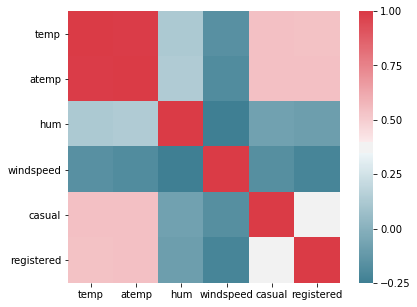

In [12]:
corr = df_corr.corr() # correlation matrix
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [13]:
#from the above heatmap it is clear that temp and atemp are highly correlated with each other

df = df.drop(columns = 'atemp')


(array([  7.,  27.,  53.,  57.,  37.,  65.,  95., 101.,  78.,  51.,  48.,
         64.,  38.,  10.]),
 array([  22.        ,  642.85714286, 1263.71428571, 1884.57142857,
        2505.42857143, 3126.28571429, 3747.14285714, 4368.        ,
        4988.85714286, 5609.71428571, 6230.57142857, 6851.42857143,
        7472.28571429, 8093.14285714, 8714.        ]),
 <a list of 14 Patch objects>)

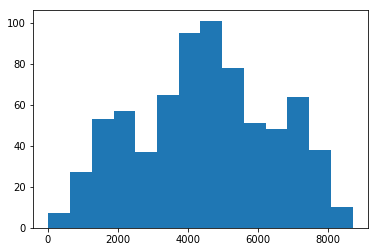

In [14]:
#Normality check
%matplotlib inline  
plt.hist(df['cnt'], bins='auto')

# the histagram below indicates that the data is normally distributed so far

{'whiskers': [<matplotlib.lines.Line2D at 0x1a27ec12e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a27ec1978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a27eb8ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a27ec1f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a27ecb390>],
 'means': []}

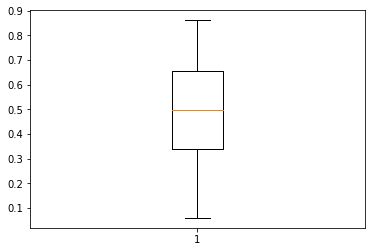

In [15]:
#outlier analysis

cnames = ['temp','hum','windspeed','casual','registered']
%matplotlib inline  
plt.boxplot(df['temp'])
#the temp has not outliers


{'whiskers': [<matplotlib.lines.Line2D at 0x1a27f22630>,
 'caps': [<matplotlib.lines.Line2D at 0x1a27f22cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a27f22278>],
 'medians': [<matplotlib.lines.Line2D at 0x1a27f2b390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a27f2b6d8>],
 'means': []}

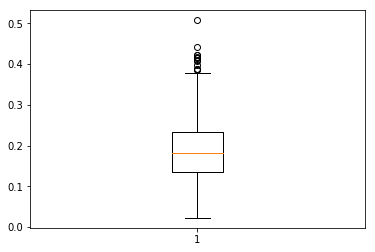

In [16]:
plt.boxplot(df['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a27fcfe48>,
 'caps': [<matplotlib.lines.Line2D at 0x1a28035518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a27fcfa90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a28035ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a28035ef0>],
 'means': []}

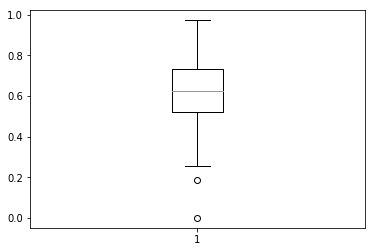

In [17]:
plt.boxplot(df['hum'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a280e8630>,
 'caps': [<matplotlib.lines.Line2D at 0x1a280e8cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a280e8278>],
 'medians': [<matplotlib.lines.Line2D at 0x1a280f1390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a280f16d8>],
 'means': []}

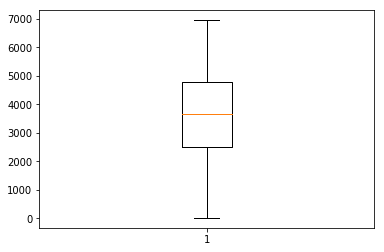

In [18]:
plt.boxplot(df['registered'])

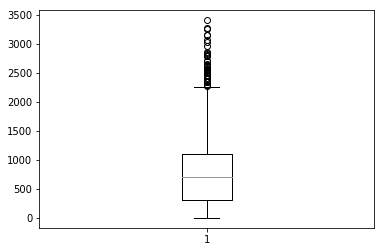

In [19]:
plt.boxplot(df['casual'])

df2 = df


In [20]:
#the outliers are present for hum, windspeed and casual
# #Extract quartiles


cnames = ['temp','hum','windspeed','casual','registered']

for i in cnames:
        df.loc[:,i] = df.loc[:,i].astype('float64')

In [21]:
for i in cnames:
    print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    loc = df.columns.get_loc(i)
    outlier_index= df[(df.loc[:,i] < min)|(df.loc[:,i] > max)].index
    
    for j in outlier_index:
        
        df.iloc[j,loc] = np.nan
        
#changed the outlier to null values
df.isnull().sum()





temp
hum
windspeed
casual
registered


dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
dtype: int64

In [22]:
#Impute with median
for i in cnames:
    df[i] = df[i].fillna(df[i].median())

In [23]:

import statsmodels.api as sm


for i in cnames:
        df.loc[:,i] = df.loc[:,i].astype('float')
         


In [24]:
# Train the model using the training sets
#Divide data into train and test
train, test = train_test_split(df, test_size=0.2)

In [25]:

model = sm.OLS(train.iloc[:,13].astype('float'),train.iloc[:,2:13].astype('float')).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9754.
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        20:12:31   Log-Likelihood:                -4246.9
No. Observations:                 584   AIC:                             8516.
Df Residuals:                     573   BIC:                             8564.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr            -8.5278     45.122     -0.189      0.850     -97.152      80.097
mnth         -12.0909      4.794     -2.522      0.012     -21.507      -2.674
holiday      -66.4770     94.999     -0.700      0.484    -253.065     120.111
weekday       24.4971      7.183      3.411      0.001      10.389      38.605
workingday  -698.7192     45.801    -15.256      0.000    -788.677    -608.761
weathersit   -31.2661     37.536     -0.833      0.405    -104.991      42.458
temp         925.9615    125.142      7.399      0.000     680.168    1171.755
hum          127.0107    119.971      1.059      0.290    -108.627     362.648
windspeed    197.2365    175.251      1.125      0.261    -146.975     541.448
casual         0.3996      0.045      8.917      0.000       0.312       0.488
registered     1.1365      0.021     54.564      0.000       1.096       1.177
==============================================================================
Omnibus:                      303.965   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1959.829
Skew:                           2.266   Prob(JB):                         0.00
Kurtosis:                      10.746   Cond. No.                     4.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# make the predictions by the model

predictions_LR = model.predict(test.iloc[:,2:13].astype('float')) 

In [30]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(test.iloc[:,13], predictions_LR)

5.989677816065642